In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt
from google.colab import files
import time

In [0]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [0]:
# Initialise Q Matrix 
Q = np.matrix(np.zeros([11,11]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Q-learning algorithm

def q_learning(alpha, gamma, epsilon, decay):
    
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # if Q-matrix is 0, select random, else follow epsilon greedy policy
  if Q[current_state, :].sum() == 0:
    action = np.random.choice(av_act, size=1)
  
  else:
    if np.random.uniform(0,1) < epsilon:
      action = np.random.choice(av_act, size=1)
    else:
      action = np.argmax(Q[current_state, :])
    
  # find max Q value after action
  next_state_row = R[action,]
  next_av_act = np.where(next_state_row >= 0)[1]
  
  if Q[action, :].sum() == 0:
    next_action = np.random.choice(next_av_act, size=1)
  
  else:
    next_action = np.argmax(Q[action, :])
  
  # update Q-matrix
  Q[current_state, action] = Q[current_state, action] + alpha * (R[current_state, action] + gamma * Q[action, next_action] - Q[current_state, action])
  
  # return Q-matrix and number of steps
  return Q, alpha, gamma, epsilon, decay 

In [0]:
def evaluate(Q, episode, alpha, gamma, epsilon, decay):
  
  # initiate current state
#   current_state = randint(0,10)
  current_state = 8
  steps = [current_state]
  reward = 0
  
  # set rule if initiated from Station 7
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  # step for start from other stations
  else:
    while current_state != 6:
      
      # check available actions 
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      # when Q-matrix is 0, select randomly from available actions
      if Q[current_state, av_act].sum() == 0:
        next_step = int(np.random.choice(av_act, size=1))
      
      # when Q-matrix is not 0, select the best action or one of the best actions
      else:
        
        # index for maximum value
        max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
        
        # if more than 1 max value, randomly choose one; otherwise, choose the max value
        if max_index.shape[0] > 1:
          next_step = int(np.random.choice(max_index, size = 1))
        else:
          next_step = int(max_index)
      
      # append next action and reward
      next_reward = np.max(Q[current_state, next_step])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, alpha, gamma, epsilon, decay, reward/len(steps)))  
  step_cont.append((episode, alpha, gamma, epsilon, decay, len(steps)))
  
  return average_reward, step_cont

In [0]:
# Define initial parameters 
alphas = [0.9] # alpha is the learning rate
gammas = [0.8] # gamma is the discount factor 
epsilons = [0.1] # epsilon is the exploration factor
decays = [0.999] # df is the decay factor for epsilon

In [0]:
average_reward = []
step_cont = []

start = time.time()

for alpha in alphas:
  for gamma in gammas:
    for decay in decays:
      for epsilon in epsilons:
        for episode in range(1000):

          Q, alpha, gamma, epsilon, decay = q_learning(alpha, gamma, epsilon, decay)
    
          if np.matrix.max(Q) > 0:
            Q_norm = (Q/np.matrix.max(Q)*100)
          else:
            Q_norm = Q

          average_reward, step_cont = evaluate(Q_norm, episode, alpha, gamma, epsilon, decay)
          
          epsilon *= decay
      
      # Reset the Q-matrix and epsilon to initial value
      Q = np.matrix(np.zeros([11,11]))
      epsilon = epsilon
          
end = time.time()
                  
print(Q_norm.astype(int))
# print(Q_norm.round(decimals=5))
# print(average_reward)
# print(step_cont)
print('Time used :', end-start, 'seconds')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


[[ 47  61   0   0  63   0   0   0   0   0   0]
 [  0   0  79   0   0  79   0   0   0   0   0]
 [  0   0  71  76   0   0  99   0   0   0   0]
 [  0   0   0  71   0   0  99   0   0   0   0]
 [ 46  60   0   0   0  79   0   0  34  12   0]
 [  0   0   0   0  20  51  99   0   0   0   0]
 [  0   0  25   0   0  71  99  43   0   0   0]
 [  0   0   0   0   0  57 100   0   0   0  63]
 [  0   0   0   0  63   0   0   0   0  34   0]
 [  0   0   0   0  63   0   0   0  11  11  56]
 [  0   0   0   0   0   0   0  79   0  45   0]]
Time used : 0.5885622501373291 seconds


In [0]:
df_reward = pd.DataFrame.from_records(average_reward, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Steps'])

df = pd.merge(df_reward, df_step, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
print(df.shape)
df.head(5)

(1000, 7)


,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps
0,0,0.9,0.8,0.90000,0.9999,0.000000,36
1,1,0.9,0.8,0.89991,0.9999,0.000000,13
2,2,0.9,0.8,0.89982,0.9999,10.000000,10
3,3,0.9,0.8,0.89973,0.9999,0.000000,39
4,4,0.9,0.8,0.89964,0.9999,2.173913,46


In [0]:
# df.to_excel('test.xlsx')
# files.download('test.xlsx')

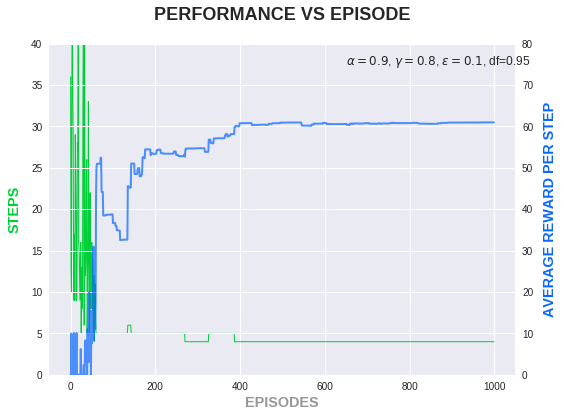

In [0]:
# Plot the performance chart

plt.style.use('seaborn')

fig, ax1 = plt.subplots()

fig.suptitle('PERFORMANCE VS EPISODE', fontsize=18, y=1.05, fontweight='bold')

ax2 = ax1.twinx()
ax1.plot(df['episode'], df['Steps'], color='#00CF38', linewidth=1, alpha=2)
ax2.plot(df['episode'], df['Average Reward Per Step'], color='#0767FF', linewidth=2, alpha=0.7)

ax1.set_ylim(0, 40)
ax2.set_ylim(0, 80)

ax1.set_xlabel('EPISODES', color='#979797', fontsize='large', fontweight='bold')
ax1.set_ylabel('STEPS', color='#00CF38', fontsize='large', fontweight='bold', labelpad=10)
ax2.set_ylabel('AVERAGE REWARD PER STEP', color='#0767FF', fontsize='large', fontweight='bold', labelpad=10)

plt.text(650, 75, r'$\alpha=0.9$, $\gamma=0.8$, $\epsilon=0.1$, df=0.95')

fig.tight_layout()
plt.show()

In [0]:
# Path from station 9

current_state = 8
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[9, 5, 6, 7]
Steps:
4
Rewards:
243


In [0]:
# Path from station 10

current_state = 9
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[10, 5, 6, 7]
Steps:
4
Rewards:
243


In [0]:
# Path from station 11

current_state = 10
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[11, 8, 7]
Steps:
3
Rewards:
179


In [0]:
# Path from station 5

current_state = 4
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[5, 6, 7]
Steps:
3
Rewards:
179


In [0]:
# Path from station 2

current_state = 1
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[2, 6, 7]
Steps:
3
Rewards:
179


In [0]:
# Path from station 1

current_state = 0
step = [current_state+1]
reward = 0

if current_state == 6:
  reward += np.max(Q_norm[current_state, :])
  
else:

  while current_state != 6:
    next_step = np.argmax(Q_norm[current_state, :])
    next_reward = np.max(Q_norm[current_state, :])
    step.append(next_step+1)
    reward += next_reward
    current_state = next_step

print("Selected path:")
print(step)

print('Steps:')
print(len(step))

print("Rewards:")
print(int(reward))

Selected path:
[1, 2, 6, 7]
Steps:
4
Rewards:
243
